In [1]:
!pip install rdflib
!pip install PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from rdflib import URIRef, BNode, Literal, Namespace, Graph
from rdflib.namespace import Namespace, NamespaceManager
from rdflib.plugins import sparql
from rdflib.namespace import RDF, RDFS, XSD
from rdflib.serializer import Serializer
import rdflib
import pandas as pd
import networkx as nx
from networkx import Graph as NXGraph
import matplotlib.pyplot as plt
from rdflib.extras.external_graph_libs import rdflib_to_networkx_graph

In [3]:
track_data = pd.read_excel('/content/russian_music.xlsx', sheet_name='Track')
track_data.head()

,trackID,trackURL,name,artist,genre,voiceGender,vibe,year,coverURL,coverDescription,coverPalette,fileName,lyricsSeed
0,1,https://music.yandex.ru/album/168144/track/169...,Это все,ДДТ,рок,1,непередаваемая светлая русская тоска,1994,https://avatars.yandex.net/get-music-content/4...,человек стоит в замочной скважине лицом к свету,"['#D9AB73', '#F2E2CE', '#8C6542', '#734E39', '...",1.txt,"['грусть', 'надежда']"
1,2,https://music.yandex.ru/album/10030/track/3863...,Звезда по имени солнце,Кино,рок,1,непередаваемая светлая русская тоска,1989,https://avatars.yandex.net/get-music-content/1...,белая звезда на черном фоне,"['#F2F2F2', '#BFBFBF', '#737373', '#404040', '...",2.txt,"['грусть', 'надежда']"
2,3,https://music.yandex.ru/album/4694349/track/26...,Ты уйдешь,Коммисар,поп,1,непередаваемая светлая русская тоска,1991,https://avatars.yandex.net/get-music-content/1...,изображение артиста,"['#D9564A', '#400101', '#D96A6A', '#F2F2F2', '...",3.txt,"['грусть', 'надежда', 'любовь', 'покорность']"
3,4,https://music.yandex.ru/album/1983500/track/17...,"Город, которого нет",Игорь Корнелюк,эстрада,1,непередаваемая светлая русская тоска,1999,https://avatars.yandex.net/get-music-content/3...,фото артиста с магическим скоплением нот межд...,"['#0A0A0D', '#395873', '#233240', '#688C8C', '...",4.txt,"['грусть', 'надежда']"
4,5,https://music.yandex.ru/album/6141483/track/45...,Ты не ангел,Алексей Глызин,эстрада,1,непередаваемая светлая русская тоска,1990,https://avatars.yandex.net/get-music-content/4...,изображение артиста со списком песен,"['#262123', '#D91E75', '#D93D93', '#989AA6', '...",5.txt,['любовь']


In [4]:
cover_data = pd.read_excel('/content/russian_music.xlsx', sheet_name='Cover')
cover_data.head()

,coverID,coverURL,coverDescription,coverPalette
0,1,https://avatars.yandex.net/get-music-content/4...,человек стоит в замочной скважине лицом к свету,"['#D9AB73', '#F2E2CE', '#8C6542', '#734E39', '..."
1,2,https://avatars.yandex.net/get-music-content/1...,белая звезда на черном фоне,"['#F2F2F2', '#BFBFBF', '#737373', '#404040', '..."
2,3,https://avatars.yandex.net/get-music-content/1...,изображение артиста,"['#D9564A', '#400101', '#D96A6A', '#F2F2F2', '..."
3,4,https://avatars.yandex.net/get-music-content/3...,фото артиста с магическим скоплением нот межд...,"['#0A0A0D', '#395873', '#233240', '#688C8C', '..."
4,5,https://avatars.yandex.net/get-music-content/4...,изображение артиста со списком песен,"['#262123', '#D91E75', '#D93D93', '#989AA6', '..."


In [5]:
lyrics_data = pd.read_excel('/content/russian_music.xlsx', sheet_name='Lyrics')
lyrics_data.head()

,lyricsID,fileName,lyricsSeed
0,1,1.txt,"['грусть', 'надежда']"
1,2,2.txt,"['грусть', 'надежда']"
2,3,3.txt,"['грусть', 'надежда', 'любовь', 'покорность']"
3,4,4.txt,"['грусть', 'надежда']"
4,5,5.txt,['любовь']


In [44]:
g = Graph()
graph = URIRef('http://visualdataweb.org/Music/')
path = 'http://visualdataweb.org/Music/'


Visualizing the graph:


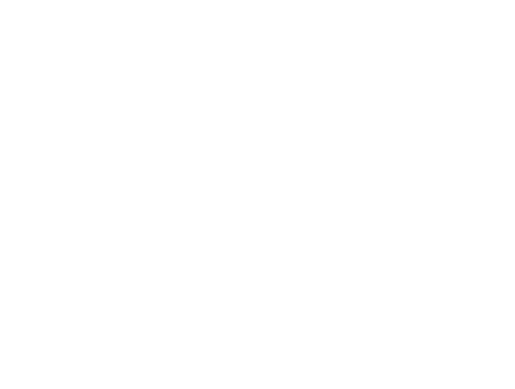

In [45]:
G = rdflib_to_networkx_graph(g)
print("Visualizing the graph:")
plt.plot()
nx.draw(G, with_labels=False)

In [46]:
Track = URIRef(path + 'Track')
Cover = URIRef(path + 'Cover')
Lyrics = URIRef(path + 'Lyrics')
LyricsAnnotation = URIRef(path + 'LyricsAnnotation')
SoundAnnotation = URIRef(path + 'SoundAnnotation')

trackID = URIRef(path + 'trackID')
trackURL = URIRef(path + 'trackURL')
name = URIRef(path + 'name')
artist = URIRef(path + 'artist')
genre = URIRef(path + 'genre')
vibe = URIRef(path + 'vibe')
voiceGender = URIRef(path + 'voiceGender')
year = URIRef(path + 'year')

coverID = URIRef(path + 'coverID')
coverURL = URIRef(path + 'coverURL')
coverDescription = URIRef(path + 'coverDescription')
coverPalette = URIRef(path + 'coverPalette')

lyricsID = URIRef(path + 'lyricsID')
fileName = URIRef(path + 'fileName')
lyricsSeed = URIRef(path + 'lyricsSeed')

textGrid = URIRef(path + 'textGrid')
minT = URIRef(path + 'minT')
maxT = URIRef(path + 'maxT')

inception_label = URIRef(path + 'inception_label')
inception_text = URIRef(path + 'inception_text')

In [47]:
# textgrid_list = []

# for t in range(len(os.listdir('/content/textgrid/'))-1):
#   tg = textgrid.TextGrid.fromFile('/content/textgrid/' + str(t+1)+'.TextGrid')
#   tg_list = []
#   for i ,tg_obj in enumerate(tg[0]):
#     tg_list.append(tg_obj)

#   print(tg_list[5])

In [48]:
# !pip install git+https://github.com/neuged/webanno_tsv
# !pip install textgrid

In [49]:
import os
i = 0
j=0
p = '/content/tsv/'
from webanno_tsv import webanno_tsv_read_file, Document
import textgrid


for index, row in track_data.iterrows():
  track = URIRef(path + 'Track' + str(row['trackID']))
  g.add((track, RDF.type, Track))
  g.add((track, trackURL, Literal(row['trackURL'])))
  g.add((track, name, Literal(row['name'])))
  g.add((track, artist, Literal(row['artist'])))
  g.add((track, genre, Literal(row['genre'])))
  g.add((track, vibe, Literal(row['vibe'])))
  g.add((track, voiceGender, Literal(row['voiceGender'])))
  g.add((track, year, Literal(row['year'])))
  g.add((track, coverURL, Literal(row['coverURL'])))
  g.add((track, coverDescription, Literal(row['coverDescription'])))
  g.add((track, coverPalette, Literal(row['coverPalette'])))
  g.add((track, fileName, Literal(row['fileName'])))
  g.add((track, lyricsSeed, Literal(row['lyricsSeed'])))
  docAnnotation = webanno_tsv_read_file('/content/tsv/'+str(row['trackID'])+'.tsv')
  i+=1

  for sentence in docAnnotation.sentences:
    g.add((track, inception_text, Literal(sentence.text)))

    for annotation in list(filter(lambda x: x.tokens[0].sentence_idx==sentence.idx, docAnnotation.annotations)):
      g.add((track, inception_label, Literal(annotation.label)))

  arr = []
  for t in range(len(os.listdir('/content/textgrid/'))-1):
    t+=1
    tg = textgrid.TextGrid.fromFile('/content/textgrid/' + str(t)+'.TextGrid')
    tg_list = []
    for i ,tg_obj in enumerate(tg[0]):
      print(tg_obj)
      # g.add((track, minT, Literal(tg_obj.minTime)))
      # g.add((track, maxT, Literal(tg_obj.maxTime)))
      g.add((track, textGrid, Literal(tg_obj)))

    # print(t)
    # textGrid = URIRef(path + 'textGrid' + str(id))
    # g.add((textGrid, SoundAnnotation, URIRef(path + 'textGrid' + str(i))))


Interval(0.0, 34.31601, None)
Interval(34.31601, 34.33383, None)
Interval(34.33383, 38.19784, Побледневшие листья окна)
Interval(38.19784, 39.83871, None)
Interval(39.83871, 44.02372, Зарастают прозрачной водой)
Interval(44.02372, 45.66118, None)
Interval(45.66118, 49.64875, У воды нет ни смерти ни дна)
Interval(49.64875, 51.21082, None)
Interval(51.21082, 52.6958, Я прощаюсь)
Interval(52.6958, 54.51272, None)
Interval(54.51272, 55.48907, с тобой)
Interval(55.48907, 57.15934, None)
Interval(57.15934, 60.92909, Горсть тепла после долгой зимы)
Interval(60.92909, 62.96837, None)
Interval(62.96837, 63.91664, Донесем)
Interval(63.91664, 65.66968, None)
Interval(65.66968, 67.73512, пять минут до утра)
Interval(67.73512, 68.52444, None)
Interval(68.52444, 69.65542, Доживем…)
Interval(69.65542, 71.43544, None)
Interval(71.43544, 73.58576, наше море вины)
Interval(73.58576, 74.19222, None)
Interval(74.19222, 75.31991, Поглощает…)
Interval(75.31991, 77.72018, None)
Interval(77.72018, 79.31882, в

Visualizing the graph:


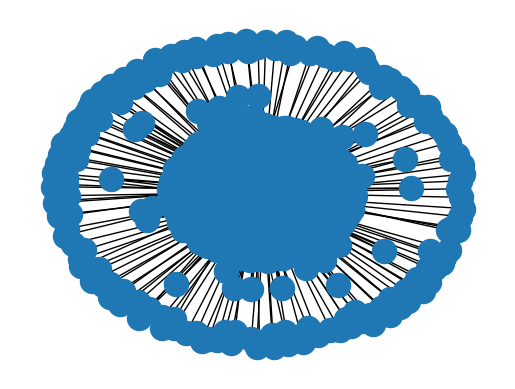

In [50]:
G = rdflib_to_networkx_graph(g)
print("Visualizing the graph:")
plt.plot()
nx.draw(G, with_labels=False)

In [13]:
print(G.nodes())

[rdflib.term.URIRef('http://visualdataweb.org/Music/Track2'), rdflib.term.Literal('205.06751', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')), rdflib.term.URIRef('http://visualdataweb.org/Music/Track8'), rdflib.term.Literal('217.65859', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')), rdflib.term.URIRef('http://visualdataweb.org/Music/Track5'), rdflib.term.Literal('196.48494', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')), rdflib.term.Literal('любя.'), rdflib.term.URIRef('http://visualdataweb.org/Music/Track4'), rdflib.term.Literal('158.83866', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')), rdflib.term.Literal('117.54626', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#double')), rdflib.term.Literal('как давно'), rdflib.term.URIRef('http://visualdataweb.org/Music/Track6'), rdflib.term.Literal('время-дыра.'), rdflib.term.Literal('140.57587', datatype=rdflib.term.URIRef('ht

In [ ]:
qres0 = g.query("""PREFIX foaf: <http://visualdataweb.org/Music/>
                SELECT ?name ?artist
                 WHERE {
                     ?x foaf:name ?name .
                     ?x foaf:artist ?artist .
                 } """)

for row in qres0:
  print(f"name {row[0]} artist {row[1]}")

name Это все artist ДДТ
name Звезда по имени солнце artist Кино
name Ты уйдешь artist Коммисар
name Город, которого нет artist Игорь Корнелюк
name Ты не ангел artist Алексей Глызин
name Не отрекаются любя artist Алла Пугачёва
name Одинокая птица artist Nautilus Pompilius
name Моя дорогая artist Моя дорогая


In [ ]:
qres1 = g.query("""
PREFIX foaf: <http://visualdataweb.org/Music/>
SELECT ?name ?year
WHERE {
?x foaf:name ?name .
?x foaf:year ?year .
}
""")

n = 1
for row in qres1:
  print(str(n)+": %s %s" % row)
  n += 1

1: Это все 1994
2: Звезда по имени солнце 1989
3: Ты уйдешь 1991
4: Город, которого нет 1999
5: Ты не ангел 1990
6: Не отрекаются любя 1977
7: Одинокая птица 1996
8: Моя дорогая 2016


In [ ]:
qres2 = g.query("""PREFIX foaf: <http://visualdataweb.org/Music/>
                SELECT ?name ?inception_label
                 WHERE {
                     ?x foaf:name ?name .
                     ?x foaf:inception_label ?inception_label .
                 } """)

for row in qres2:
  print(f" name {row[0]} inception {row[1]}")

 name Это все inception печаль
 name Звезда по имени солнце inception печаль
 name Ты уйдешь inception печаль
 name Город, которого нет inception печаль
 name Не отрекаются любя inception печаль
 name Одинокая птица inception печаль
 name Это все inception оптимизм
 name Звезда по имени солнце inception оптимизм
 name Это все inception горе
 name Звезда по имени солнце inception горе
 name Одинокая птица inception горе
 name Это все inception безмятежность
 name Звезда по имени солнце inception безмятежность
 name Ты уйдешь inception безмятежность
 name Город, которого нет inception безмятежность
 name Одинокая птица inception безмятежность
 name Моя дорогая inception безмятежность
 name Это все inception грусть
 name Звезда по имени солнце inception грусть
 name Не отрекаются любя inception грусть
 name Одинокая птица inception грусть
 name Моя дорогая inception грусть
 name Это все inception принятие
 name Город, которого нет inception принятие
 name Ты не ангел inception принятие
 n

In [53]:
qres3 = g.query("""PREFIX foaf: <http://visualdataweb.org/Music/>
                SELECT ?name ?textGrid
                 WHERE {
                     ?x foaf:name ?name .

                     ?x foaf:textGrid ?textGrid .
                 } """)

for row in qres3:
  print(f" name {row[0]}, textGrid {row[1]}")

 name Это все, textGrid Interval(0.0, 34.31601, None)
 name Это все, textGrid Interval(34.31601, 34.33383, None)
 name Это все, textGrid Interval(34.33383, 38.19784, Побледневшие листья окна)
 name Это все, textGrid Interval(38.19784, 39.83871, None)
 name Это все, textGrid Interval(39.83871, 44.02372, Зарастают прозрачной водой)
 name Это все, textGrid Interval(44.02372, 45.66118, None)
 name Это все, textGrid Interval(45.66118, 49.64875, У воды нет ни смерти ни дна)
 name Это все, textGrid Interval(49.64875, 51.21082, None)
 name Это все, textGrid Interval(51.21082, 52.6958, Я прощаюсь)
 name Это все, textGrid Interval(52.6958, 54.51272, None)
 name Это все, textGrid Interval(54.51272, 55.48907, с тобой)
 name Это все, textGrid Interval(55.48907, 57.15934, None)
 name Это все, textGrid Interval(57.15934, 60.92909, Горсть тепла после долгой зимы)
 name Это все, textGrid Interval(60.92909, 62.96837, None)
 name Это все, textGrid Interval(62.96837, 63.91664, Донесем)
 name Это все, text

In [ ]:
print("networkx Graph loaded successfully with length {}".format(len(G)))

networkx Graph loaded successfully with length 161
